In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_palette("Set2")

#### Visualizações - CNVCC

In [4]:
df_cnvcc = pd.read_csv('Datasets/CNVCC - Nodeste.csv')

ParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.

In [ ]:
df_cnvcc.head()

#### Visualizações - SRAG 2021

In [5]:
df_srag = pd.read_csv('Datasets/SRAG - 2021.csv')

In [6]:
#Conversao em datetime
df_srag["DT_INTERNA"] = pd.to_datetime(df_srag["DT_INTERNA"],errors="coerce", dayfirst=True)
df_srag["DT_EVOLUCA"] = pd.to_datetime(df_srag["DT_EVOLUCA"],errors="coerce", dayfirst=True)
df_srag["DT_ENTUTI"] = pd.to_datetime(df_srag["DT_ENTUTI"],errors="coerce", dayfirst=True)
df_srag["DT_SAIDUTI"] = pd.to_datetime(df_srag["DT_SAIDUTI"],errors="coerce", dayfirst=True)

In [7]:
#Criacao de novas colunas
df_srag["TEMPO_INTER"] = ((df_srag["DT_EVOLUCA"] - df_srag["DT_INTERNA"]).dt.days).astype("Int64")
df_srag["TEMPO_UTI"] = ((df_srag["DT_SAIDUTI"] - df_srag["DT_ENTUTI"]).dt.days).astype("Int64")

### Linha SEM_NOT e OBITOS

<AxesSubplot:xlabel='SEM_NOT', ylabel='QTD'>

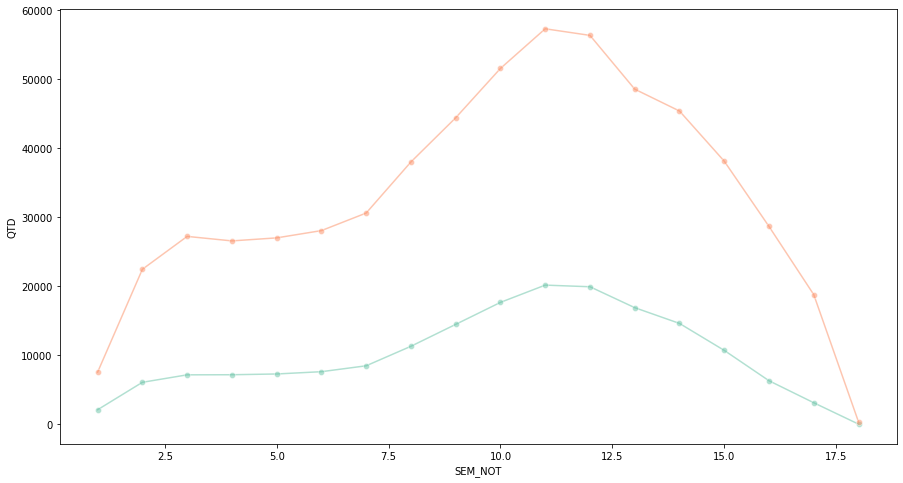

In [8]:
df2 = pd.DataFrame(df_srag.groupby("SEM_NOT").size().reset_index(name="qtd")) 


df3 = df_srag[["SEM_NOT", "EVOLUCAO"]]
df3 = df3.groupby(["EVOLUCAO", "SEM_NOT"]).size().reset_index(name="QTD")
df3 = df3[df3["EVOLUCAO"] == 2]

dims = (15, 8)

fig, ax = plt.subplots(figsize=dims)

sns.lineplot(data=df3, x="SEM_NOT", y = "QTD", alpha = 0.5, marker='o')
sns.lineplot(data=df2, x="SEM_NOT", y="qtd", alpha=0.5, marker='o')

### Barra UF

<AxesSubplot:xlabel='SG_UF', ylabel='QTD'>

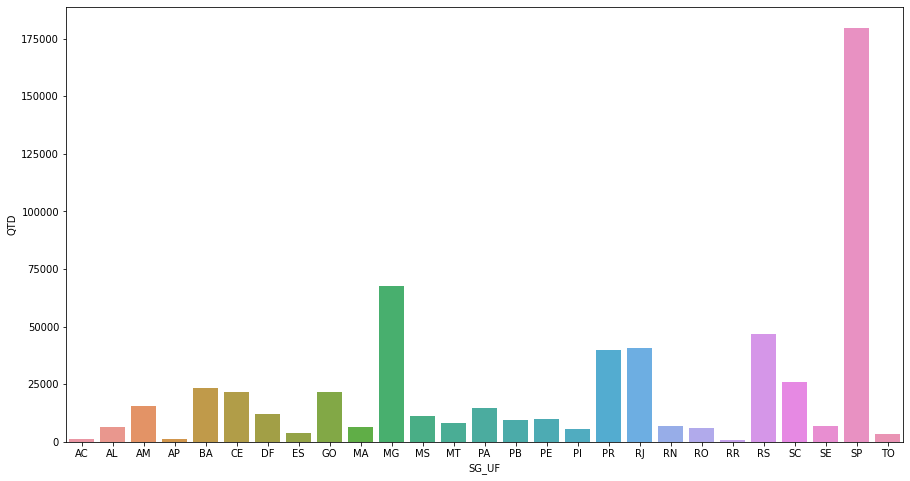

In [9]:
df = df_srag.groupby("SG_UF")
df = pd.DataFrame(df.size().reset_index(name="QTD"))

dims = (15, 8)

fig, ax = plt.subplots(figsize=dims)

sns.barplot(data=df, x="SG_UF", y="QTD", ax=ax)

### Barra Sintomas

<AxesSubplot:xlabel='SINTOMA', ylabel='QTD'>

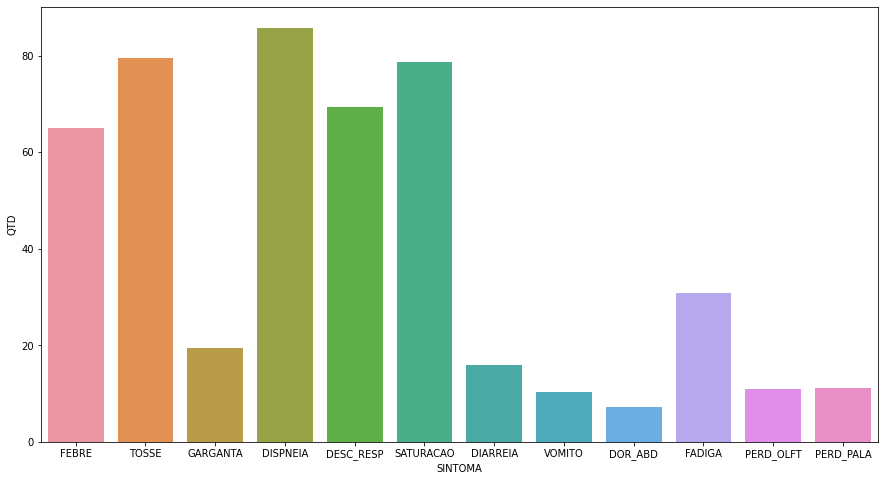

In [10]:
test = df_srag[['CLASSI_FIN', 'FEBRE', 'TOSSE', 'GARGANTA', 'DISPNEIA', 'DESC_RESP', 'SATURACAO', 'DIARREIA', 'VOMITO', 'DOR_ABD', 'FADIGA', 'PERD_OLFT', 'PERD_PALA']]

total5 = test.value_counts([test["CLASSI_FIN"] == 5]).iloc[0]

sintomas = test.groupby("CLASSI_FIN").count().columns

qtd=[]
for i in sintomas:
    qtd.append(((test[test[i] == 1].value_counts(i).iloc[0]) / total5) * 100)

dff = pd.DataFrame(columns =["SINTOMA", "QTD"])
dff['SINTOMA'] = sintomas
dff['QTD'] = qtd

dff

dims = (15, 8)

fig, ax = plt.subplots(figsize=dims)

sns.barplot(data=dff, x="SINTOMA", y="QTD", ax=ax)

### Histograma IDADE

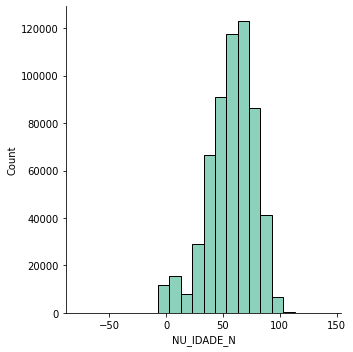

In [11]:
sns.displot(data=df_srag, x="NU_IDADE_N", binwidth=10)

### Dispersãp IDADE x TEMPO INTERNADO

<AxesSubplot:xlabel='NU_IDADE_N', ylabel='TEMPO_INTER'>

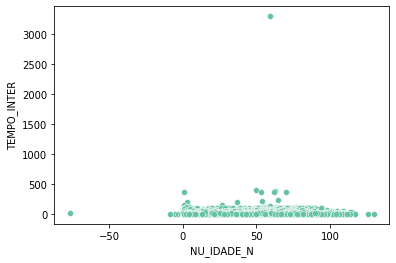

In [12]:
sns.scatterplot(data=df_srag, x="NU_IDADE_N", y="TEMPO_INTER")